In [12]:
import numpy as np

# TODO: In "for a in action[s]" add wall
# TODO: Plot delta over iteration for seeing how it smallens everytime

### Create States
states = []

for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

### Create reward dictionary
rewards = {}

for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1

    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1

    # For all other states
    else:
        rewards[state] = 0
    
### Define actions
# U = Up, D = Down, L = Left, R = Right
actions = {
    (3, 1): ["U", "R"],             # Start state
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (1, 4): ["L", "D"],             # Green Terminal state
    (2, 1): ["U", "D"],             # (2, 2) is wall so we can basically ignore it here
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (2, 4): ["U", "L", "D"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

### Define initial policy, here: Random
policy = {}
for state in actions.keys():
    policy[state] = np.random.choice(actions[state])

### Value Iteration Presetting ###
# 0th Step: Set Hyperparams
GAMMA = 0.9
EPSILON = 0.1
THETA = 0.005

# 1st Step: Initialize all V(s) arbitrary
V = {}
for s in states:
    if s == (1, 4):
        V[s] = 1
    if s == (2, 4):
        V[s] = -1
    else:
        V[s] = 0

delta_records = []

# Value Iteration
numb_of_iteration = 0
while True:
    delta = 0
    for s in states:
        if s in policy:
            v_init = V[s]
            v_post = 0

            # Get next state by altering the state tuple
            for a in actions[s]:
                # If action is Up
                if a == "U":
                    next_state = (s[0] - 1, s[1])
                # If action is Down
                if a == "D":
                    next_state = (s[0] + 1, s[1])
                # If action is Left
                if a == "L":
                    next_state = (s[0], s[1] - 1)
                # If action is Right
                if a == "R":
                    next_state = (s[0], s[1] + 1)

                # Choose random action to tackle exploitation vs exploration
                a_rand = np.random.choice([i for i in actions[s] if i != a])
                if a_rand == "U":
                    rand_nxt_s = (s[0] - 1, s[1])
                if a_rand == "D":
                    rand_nxt_s = (s[0] + 1, s[1])
                if a_rand == "L":
                    rand_nxt_s = (s[0], s[1] - 1)
                if a_rand == "R":
                    rand_nxt_s = (s[0], s[1] + 1)
 
                # Calculate new value of state s
                # print("Current state: {},\nNext state: {},\nRandom Action: {}".format(s, next_state, a_rand))
                v = rewards[s] + (GAMMA * ((1-EPSILON) * V[next_state] + (EPSILON * V[rand_nxt_s])))
                # If new value of v(s) is better than the old value, i.e. v_init, then keep it
                if v > v_post:
                    v_post = v
                    policy[s] = a

            V[s] = v_post

            # Calculate delta, i.e. difference between the old value and the new value
            delta = max(delta, np.abs(v_init - V[s]))
            delta_records.append(delta)                     # Optional

    if delta < THETA:
        break
    numb_of_iteration += 1

print(numb_of_iteration)
print(V)
print(policy)




30
{(1, 1): 2.9500042678786973, (1, 2): 3.358346171447534, (1, 3): 3.821845787338452, (1, 4): 4.343953671834045, (2, 1): 2.599743905469941, (2, 2): 2.9541210848684356, (2, 3): 3.3439536718340452, (2, 4): 2.7556013928700467, (3, 1): 2.3396532494265854, (3, 2): 2.595631527074829, (3, 3): 2.9422093116223116, (3, 4): 2.6311936677723766}
{(3, 1): 'U', (1, 1): 'R', (1, 2): 'R', (1, 3): 'R', (1, 4): 'L', (2, 1): 'U', (2, 2): 'U', (2, 3): 'U', (2, 4): 'U', (3, 2): 'R', (3, 3): 'U', (3, 4): 'L'}


# Plotting

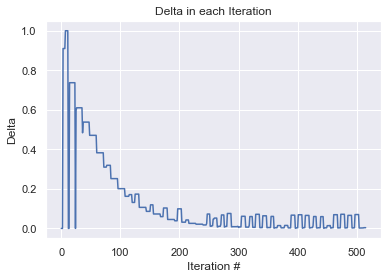

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(delta_records)
plt.xlabel("Iteration #")
plt.ylabel("Delta")
plt.title("Delta in each Iteration")
plt.show()